# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw1 03_Assignment_1.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename=03_Assignment_1.ipynb
local_scp_filepath=~/git/iaml2017/${filename}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} ${UUN}@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} ${UUN}@${server_address}:${filename}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw1 03_Assignment_1.ipynb
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [5 marks] ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

In [36]:
# Loading A
part_A = os.path.join(os.getcwd(), 'datasets', 'train_20news_partA.csv')
news_A = pd.read_csv(part_A)

#Loading B
part_B = os.path.join(os.getcwd(), 'datasets', 'train_20news_partB.csv')
news_B = pd.read_csv(part_B)

### ========== Question 1.2 --- [3 marks] ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

In [37]:
news_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


### ========== Question 1.3 --- [3 marks] ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

There are 2129 data points and 521 attributes in Dataset A.

### ========== Question 1.4 --- [3 marks] ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

In [38]:
news_A.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


### ========== Question 1.5 --- [3 marks] ==========
Display the first 7 instances of dataset A.

In [39]:
news_A.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


### ========== Question 1.6 --- [5 marks] ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

In [40]:
news_A.columns.values.tolist()[: 100]



['w1_aaa',
 'w2_pins',
 'w3_kmr',
 'w4_notion',
 'w5_queens',
 'w6_dwyer',
 'w7_defenseman',
 'w8_gld',
 'w9_tocchet',
 'w10_home',
 'w11_buying',
 'w12_internet',
 'w13_slots',
 'w14_compatible',
 'w15_transfer',
 'w16_baltimore',
 'w17_mean',
 'w18_person',
 'w19_performance',
 'w20_support',
 'w21_tor',
 'w22_gm',
 'w23_mouse',
 'w24_base',
 'w25_population',
 'w26_bob',
 'w27_set',
 'w28_it',
 'w29_earth',
 'w30_faith',
 'w31_steve',
 'w32_caps',
 'w33_printer',
 'w34_east',
 'w35_cable',
 'w36_adapter',
 'w37_mss',
 'w38_catcher',
 'w39_bullpen',
 'w40_obp',
 'w41_innocent',
 'w42_european',
 'w43_angeles',
 'w44_settings',
 'w45_words',
 'w46_rit',
 'w47_shots',
 'w48_ports',
 'w49_vga',
 'w50_coverage',
 'w51_jumpers',
 'w52_bases',
 'w53_sea',
 'w54_pts',
 'w55_behavior',
 'w56_domi',
 'w57_sabres',
 'w58_yzerman',
 'w59_messier',
 'w60_goalies',
 'w61_hawks',
 'w62_our',
 'w63_sx',
 'w64_view',
 'w65_hitters',
 'w66_richard',
 'w67_point',
 'w68_nyi',
 'w69_mvp',
 'w70_kill',


### ========== Question 1.7 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

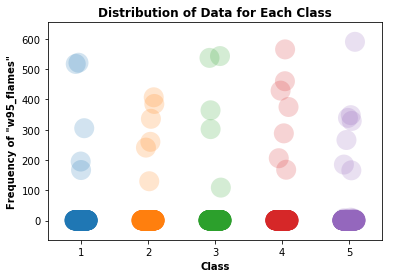

In [41]:
ax = sns.stripplot(x="class", y="w95_flames", data=news_A, jitter=True, size=20 ,alpha=0.2)


# Labelling the title and axes
plt.title('Distribution of Data for Each Class', fontweight='bold')
plt.ylabel('Frequency of "w95_flames"', fontweight='bold')
plt.xlabel('Class', fontweight='bold')

## ========== Question 1.8 --- [4 marks] ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

In [42]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

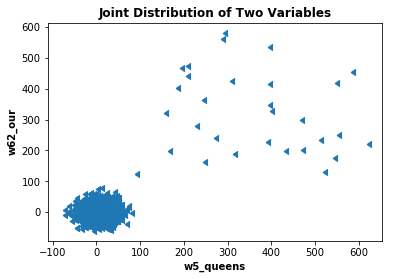

In [43]:
scatter_jitter(news_A['w62_our'], news_A['w5_queens'], jitter=0.5)

# Labelling the title and axes
plt.title('Joint Distribution of Two Variables', fontweight='bold')
plt.ylabel('w62_our', fontweight='bold')
plt.xlabel('w5_queens', fontweight='bold')

### ========== Question 1.9 --- [7 marks] ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

In [44]:
# Creating a copy
import copy
filtered_A = copy.deepcopy(news_A) 

# Removing outliers
threshold = 100 
# tried with 10 first (based on the info given in the question "usually in the range 1-10", then 20, 30... 
# 100 gives a better accuracy score while more than that seemed like noise contamination.

news_A_clean = filtered_A[filtered_A < threshold].dropna()
news_A_clean





,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,5.0,3.0,6.0,8.0,4.0,6.0,4.0,8.0,4
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,3.0,6.0,8.0,3.0,4.0,5.0,6.0,5.0,4
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,4.0,2.0,6.0,5.0,2.0,5.0,5.0,7.0,8.0,2
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,3.0,6.0,1.0,1.0,8.0,1.0,8.0,4.0,3
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,6.0,1.0,7.0,8.0,6.0,3.0,1.0,8.0,4.0,3
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,7.0,5.0,4.0,5.0,5.0,7.0,7.0,7.0,2.0,2
6,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,...,3.0,6.0,8.0,8.0,3.0,5.0,2.0,1.0,2.0,1
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,8.0,6.0,2.0,3.0,7.0,8.0,2.0,5.0,3
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,5.0,3.0,7.0,8.0,1.0,2.0,3.0,2.0,6.0,5
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,7.0,2.0,4.0,1.0,2.0,5.0,7.0,1.0,1


### ========== Question 1.10 --- [3 marks] ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

In [45]:
DP = news_A_clean.shape[0]
print('Number of datapoints in clean dataset: {}'.format(DP))

OutL = news_A.shape[0] - DP
print('Number of documents that have been excluded as outliers: {}'.format(OutL))



Number of datapoints in clean dataset: 2091
Number of documents that have been excluded as outliers: 38


## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [4 marks] ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

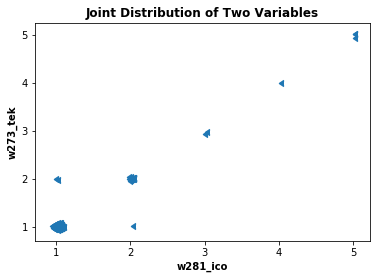

In [46]:
scatter_jitter(news_A_clean['w281_ico'], news_A_clean['w273_tek'], jitter = 0.1)

# Labelling the title and axes
plt.title('Joint Distribution of Two Variables', fontweight='bold')
plt.ylabel('w273_tek', fontweight='bold')
plt.xlabel('w281_ico', fontweight='bold')



### ========== Question 2.2 --- [6 marks] ==========
What do you observe? 

How does that relate to the Naive Bayes assumption? 

What would be the main issue we would have to face if we didn't make this assumption?

A linear relationship can be observed between the two variables. 

This goes against the Naive Bayes assumption where variables are conditionally independant of one another, given a class. Our joint distribution shows that these two variables are in some way dependent on each other.

If we did not make this assumption, while still an optimal model, it will be computationally expensive - not looking at variables separately would mean a larger number of parameters.



### ========== Question 2.3 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

In [47]:
# Fitting a Gaussian Naive Bayes model 

from sklearn.naive_bayes import GaussianNB


Xclean = news_A_clean[news_A_clean.columns[0:519]]
yclean = news_A_clean[news_A_clean.columns[520]]

model_clean = GaussianNB()
model_clean.fit(X=Xclean, y=yclean)

from sklearn.metrics import accuracy_score

ca = accuracy_score(yclean, model_clean.predict(Xclean))
print('Classification accuracy for the cleaned Dataset A: {}'.format(ca))



Classification accuracy for the cleaned Dataset A: 0.889048302248


### ========== Question 2.4 --- [5 marks] ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

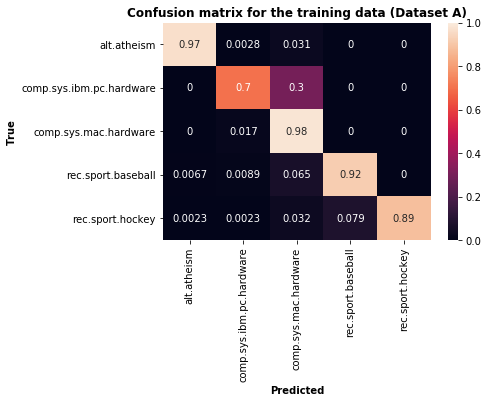

In [48]:
from sklearn.metrics import confusion_matrix

tr_pred = model_clean.predict(X=Xclean)
cm = confusion_matrix(yclean, tr_pred)

cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
        
# Labelling the title and axes, plotting

    plt.title('Confusion matrix for the training data (Dataset A)', fontweight='bold')
    plt.ylabel('True', fontweight='bold')
    plt.xlabel('Predicted', fontweight='bold')
    
    
plt.figure()
plot_confusion_matrix(cm_norm, classes=['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.sport.baseball', 'rec.sport.hockey'])

### ========== Question 2.5 --- [3 marks] ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

Yes. The confusion matrix shows that our Gaussian Naive Bayes model worked well - easily because the dataset was cleaned of outliers. 

### ========== Question 2.6 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

In [51]:
Xori = news_A[news_A.columns[0:519]]
yori = news_A[news_A.columns[520]]

# Fitting a Gaussian NB
model_ori = GaussianNB()
model_ori.fit(X=Xori, y=yori)

# Classification accuracy
ca = accuracy_score(yori, model_ori.predict(Xori))
print('Classification accuracy for the original Dataset A: {}'.format(ca))




Classification accuracy for the original Dataset A: 0.205730389854


### ========== Question 2.7 --- [4 marks] ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

Naive Bayes is very sensitive to outliers or data points that are widely distributed. Because of this, we can see that our cleaned dataset, sans outliers, allows for a much higher accuracy score than with the original dataset which performs horribly in comparison when fitted with a Gaussian Naive Bayes model. 

In other words, in cleaning the dataset, we increase the robustness of the model.

### ========== Question 2.8 --- [5 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

Classification accuracy for Dataset B: 0.8359375


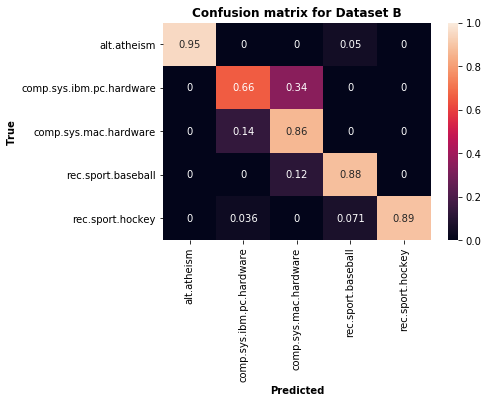

In [57]:
Xnew = news_B[news_B.columns[0:519]]
ynew = news_B[news_B.columns[520]]

# Classification accuracy
ca = accuracy_score(ynew, model_clean.predict(Xnew))
print('Classification accuracy for Dataset B: {}'.format(ca))

# Confusion matrix
n_pred = model_clean.predict(X=Xnew)
cm_new = confusion_matrix(ynew, n_pred)

cm_new_norm = cm_new/cm_new.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(cm, classes=None):
    
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
        
# Labelling the title and axes, plotting

    plt.title('Confusion matrix for Dataset B', fontweight='bold')
    plt.ylabel('True', fontweight='bold')
    plt.xlabel('Predicted', fontweight='bold')
    
    
plt.figure()
plot_confusion_matrix(cm_new_norm, classes=['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.sport.baseball', 'rec.sport.hockey'])

### ========== Question 2.9 --- [4 marks] ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

The accuracy score for Dataset B are somewhat similar to those from our cleaned training dataset which is acceptable. 

The easiest class to predict is alt.atheism while the most difficult is comp.sys.ibm.pc.hardware. 

### ========== Question 2.10 --- [4 marks] ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

A reasonable baseline can be found using a Dummy Classifier as, according to the documentation, it "always predicts the most frequent label in the training set". 

Using this as a reference to answer what it's performance would be like on this dataset, I would say that it would do quite badly eventhough it's bound to get some of it right just as if someone were guessing the answer.

### ========== Question 2.11 --- [4 marks] ==========

Estimate the baseline performance.

Classification accuracy for Dataset B using a Dummy Classifier: 0.25


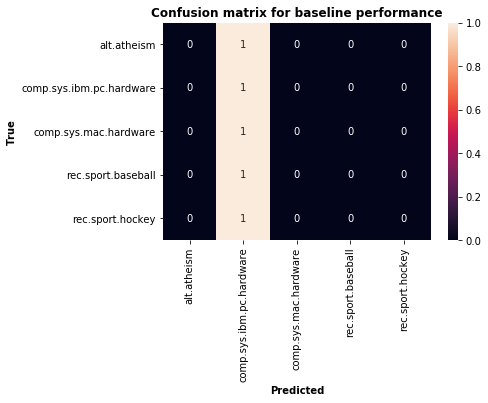

In [68]:
from sklearn.dummy import DummyClassifier

Xbase = news_B[news_B.columns[0:519]]
ybase = news_B[news_B.columns[520]]

model_base = DummyClassifier(strategy='most_frequent',random_state=0)
model_base.fit(X=Xbase, y=ybase)

# Classification accuracy
ca = accuracy_score(ybase, model_base.predict(Xbase))
print('Classification accuracy for Dataset B using a Dummy Classifier: {}'.format(ca))

# Confusion matrix
base_pred = model_base.predict(X=Xbase)
cm_base = confusion_matrix(ybase, base_pred)

cm_base_norm = cm_base/cm_base.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(cm, classes=None):
    
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
        
# Labelling the title and axes, plotting

    plt.title('Confusion matrix for baseline performance', fontweight='bold')
    plt.ylabel('True', fontweight='bold')
    plt.xlabel('Predicted', fontweight='bold')
    
    
plt.figure()
plot_confusion_matrix(cm_base_norm, classes=['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.sport.baseball', 'rec.sport.hockey'])



### ========== Question 2.12 --- [3 marks] ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

Classification accuracy for Dataset B using a RandomForestClassifier: 0.859375


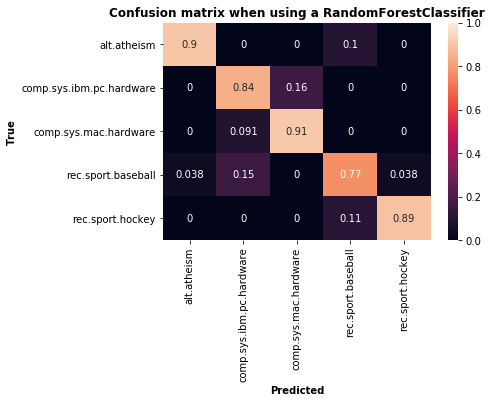

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50).fit(X=news_A_clean.drop("class", axis=1), y=news_A_clean["class"])
X_ts = news_B.drop('class', axis=1)
rf_prediction = rf.predict(X=X_ts)


# Confusion Matrix

cm_RFC = confusion_matrix(ynew, rf_prediction)
cm_RFC_norm = cm_RFC/cm_RFC.sum(axis=1)[:, np.newaxis]

def plot_confusion_matrix(cm, classes=None):
    
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)

# Labelling the title and axes, plotting

    plt.title('Confusion matrix when using a RandomForestClassifier', fontweight='bold')
    plt.ylabel('True', fontweight='bold')
    plt.xlabel('Predicted', fontweight='bold')
    
plt.figure()
plot_confusion_matrix(cm_RFC_norm, classes=['alt.atheism', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.sport.baseball', 'rec.sport.hockey'])


# Classification accuracy
ca = accuracy_score(ynew, rf_prediction)
print('Classification accuracy for Dataset B using a RandomForestClassifier: {}'.format(ca))



### ========== Question 2.13 --- [8 marks] ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier. Feel free to use code and plots to illustrate your points.

I would choose Random Forest. It has a higher accuracy scora than Naive Bayes. 

While one could argue that the Gaussian Naive Bayes classifier did quite well as it's accuracy score is quite close to the Random Forest score, we know that it only works well when our data is also naive. That is, once we've cleaned out the data and removed outliers. In fact, because of it's sensitivity to outliers, one of the reasons this classifier probably achieved a lower score than Random Forest is because it did not generalize well to the test data that it has never seen.  


Finally, as seen in Q 2.1 and the comparisons made below between different variables, some of the variables from our training data show a dependency on other variables in the training dat. While Naive Bayes can still run, Random Forest can handle this linear relationship better. 

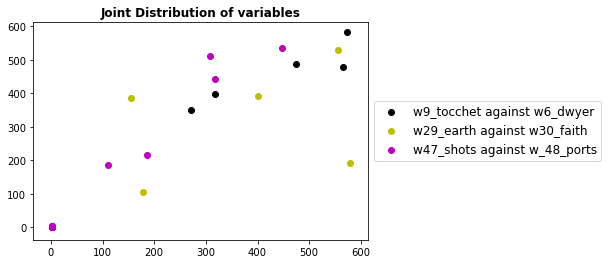

In [109]:
sns.hea

